In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('spam.csv',encoding = "latin1")

In [14]:
df.head()

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [15]:
df.shape

(5572, 5)

### 1. Data Cleaning:

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [17]:
# Since there are null values in the last 3 columns lets remove them.

df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [18]:
df.head()

v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

In [20]:
# Lets rename the remaning columns:

df.rename(columns = {'v1':'target',
                    'v2':'text'}, inplace = True)

df.head()

target                                               text
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...

In [21]:
# Now let us convert the target to numerical class:

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [24]:
df['target'] = encoder.fit_transform(df['target'])

In [26]:
df.drop(columns=['taget'], inplace= True)

In [27]:
df.head()

target                                               text
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...

SPAM is enoded as 1
HAM is encoded as 0

In [28]:
# Now lets check the null values.

df.isnull().sum()

target    0
text      0
dtype: int64

In [31]:
# now lets check the duplicate values.

df.duplicated().sum()

403

In [32]:
# There are 403 duplicate values, lets drop them.

df = df.drop_duplicates(keep='first')

In [33]:
df.duplicated().sum()

0

In [34]:
df.shape

(5169, 2)

### 2. EDA:

In [35]:
df.head()

target                                               text
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...

In [36]:
# Let us check how the taget is distributed:

df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

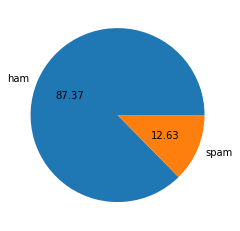

In [40]:
# Lets plot the PIE chart to check the distribution:

plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct='%0.2f')
plt.show()

We can confirm from the above pie chart is that HAM class is dominated  over the SPAM, So data is imbalanced.

Performing basic text analysis to better understand the texts in the SMS:

In [41]:
import nltk

In [76]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\varun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\varun\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [44]:
df['num_characters'] = df['text'].apply(len)

In [45]:
df.head()

target                                               text  num_characters
0       0  Go until jurong point, crazy.. Available only ...             111
1       0                      Ok lar... Joking wif u oni...              29
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155
3       0  U dun say so early hor... U c already then say...              49
4       0  Nah I don't think he goes to usf, he lives aro...              61

In [49]:
# num of words in the text.

df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [50]:
df.head()

target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  
0         24  
1          8  
2         37  
3         13  
4         15

In [51]:
# Similarly lets check the number of sentences in each SMS:

df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [52]:
df.head()

target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentences  
0         24              2  
1          8              2  
2         37              2  
3         13              1  
4         15              1

In [53]:
# Lets check whats these new features are telling about the sms data:

df[['num_characters','num_words','num_sentences']].describe()

num_characters    num_words  num_sentences
count     5169.000000  5169.000000    5169.000000
mean        78.977945    18.453279       1.947185
std         58.236293    13.324793       1.362406
min          2.000000     1.000000       1.000000
25%         36.000000     9.000000       1.000000
50%         60.000000    15.000000       1.000000
75%        117.000000    26.000000       2.000000
max        910.000000   220.000000      28.000000

Lets check separetly for SPAM and HAM

In [54]:
# HAM:

df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

num_characters    num_words  num_sentences
count     4516.000000  4516.000000    4516.000000
mean        70.459256    17.120903       1.799601
std         56.358207    13.493725       1.278465
min          2.000000     1.000000       1.000000
25%         34.000000     8.000000       1.000000
50%         52.000000    13.000000       1.000000
75%         90.000000    22.000000       2.000000
max        910.000000   220.000000      28.000000

In [55]:
# SPAM:

df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

num_characters   num_words  num_sentences
count      653.000000  653.000000     653.000000
mean       137.891271   27.667688       2.967841
std         30.137753    7.008418       1.483201
min         13.000000    2.000000       1.000000
25%        132.000000   25.000000       2.000000
50%        149.000000   29.000000       3.000000
75%        157.000000   32.000000       4.000000
max        224.000000   46.000000       8.000000

on an average  HAM texts has lesser number of characters, words and sentences compared to SPAM texts.

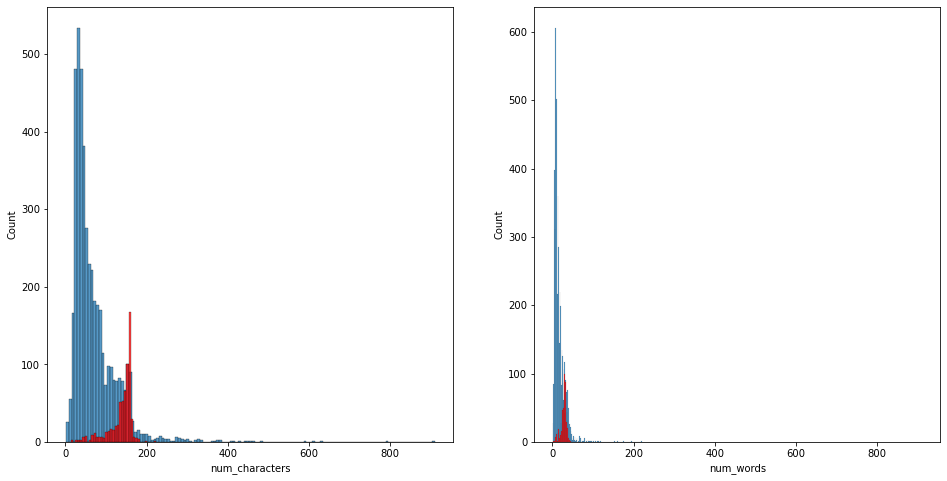

In [67]:
# Lets plot histogram to confirm this:

import seaborn as sns

figure, axes = plt.subplots(1,2, sharex=True,
                            figsize=(16, 8))

sns.histplot(df[df['target']==0]['num_characters'], ax = axes[0])
sns.histplot(df[df['target']==1]['num_characters'], color='red', ax=axes[0])

sns.histplot(df[df['target']==0]['num_words'], ax = axes[1])
sns.histplot(df[df['target']==1]['num_words'], color='red', ax=axes[1])

plt.show()

Above histogram confirms that SPAM sms has more number of characters  in it.

<AxesSubplot:>

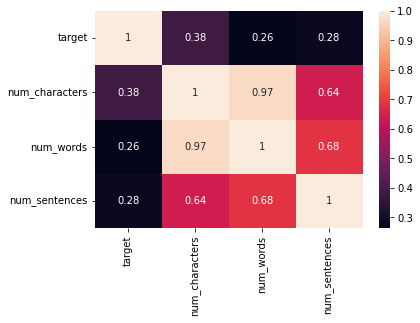

In [71]:
# Checking the correlation between different features:

sns.heatmap(df.corr(), annot=True)

From the above correlation heatmap we can say that:
* target variable has high correlation with num_characters.
* num_characters, num_words and num_sentences are hightly correlated.

--> So there is multicolinearity in the dataset.

### 3. Data Preprocessing:

Steps followed are-

* Lower case conversion
* Tokenization 
* Removing special characters 
* Removing stop words and punctuations
* Stemming.

In [73]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

In [74]:
def transform_text(text):
    
    # converting to lower case
    text = text.lower()
    # Word tokenization:
    text = nltk.word_tokenize(text)
    # Removing special characters:
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    # Removing stop words and punctuations
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    # Steming the sentences
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
        
    return ' '.join(y)

In [77]:
df['transformed_text'] = df['text'].apply(transform_text)

In [78]:
df.head()

target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentences                                   transformed_text  
0         24              2  go jurong point crazi avail bugi n great world...  
1          8              2                              ok lar joke wif u oni  
2         37              2  free entri 2 wkli comp win fa cup final tkt 21...  
3         13              1                u dun say earli hor u c alreadi say  
4         15              1               nah think goe usf live around though

In [92]:
# Creating a spam corpus to find the most repeated word in spam messages:

spam_corpus = []

for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [93]:
len(spam_corpus)

9939

C:\Users\varun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


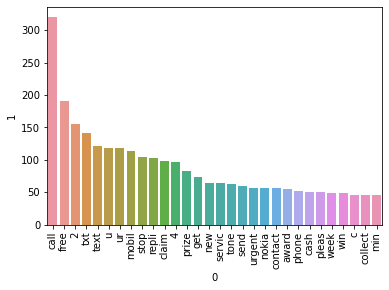

In [94]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [95]:
# Creating a ham corpus to find the most repeated word in spam messages:

ham_corpus = []

for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [96]:
len(ham_corpus)

35394

C:\Users\varun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


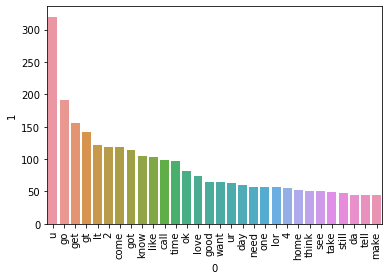

In [97]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

### 4. Mode building:

In [138]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv= CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [139]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [140]:
X.shape

(5169, 3000)

In [141]:
y = df['target'].values

In [142]:
y.shape

(5169,)

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [145]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [146]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [147]:
# fitting on Gaussian Naïve bayes
gnb.fit(X_train, y_train)
y_preds1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_preds1))
print(confusion_matrix(y_test,y_preds1))
print(precision_score(y_test,y_preds1))

0.8607350096711799
[[769 120]
 [ 24 121]]
0.5020746887966805


In [148]:
# fitting on Multinomial Naïve bayes
mnb.fit(X_train, y_train)
y_preds2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_preds2))
print(confusion_matrix(y_test,y_preds2))
print(precision_score(y_test,y_preds2))

0.9729206963249516
[[888   1]
 [ 27 118]]
0.9915966386554622


In [149]:
# fitting on Bernauli Naïve bayes
bnb.fit(X_train, y_train)
y_preds3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_preds3))
print(confusion_matrix(y_test,y_preds3))
print(precision_score(y_test,y_preds3))

0.9729206963249516
[[884   5]
 [ 23 122]]
0.9606299212598425


**Multinomial Naive Bayes** performs well along with Tfidf vectorization.

### 5. Export the model in pickle file:

*whenever the user enters the text message to check whether it is spam or not following stpes need to be performed:*

* Text must to be preprocssed by following the below steps:
    * Lower case conversion
    * Tokenization 
    * Removing special characters 
    * Removing stop words and punctuations
    * Stemming.
    

* Further the processed text must be vectorized by using TfidfVectorizer.


* Inputs must be sent to model for prediction.


In [150]:
import pickle

In [151]:
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))